In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv('../data/population_Final.csv', encoding='EUC-KR')

In [3]:
bus = pd.read_excel('../data/버정_최종.xlsx',encoding='EUC-KR')

In [4]:
bus = bus.rename(columns={'구분':'행정구역'})

In [5]:
result = pd.merge(bus, pop, on="행정구역")

In [6]:
result

,행정구역,전체버스정류장,인구수
0,서울,6240,9577030
1,부산,6993,3385964
2,대구,3111,2927925
3,인천,5346,2428301
4,광주,2248,1469981
5,대전,2518,1450439
6,울산,3083,1144299
7,전체,29539,51349072


In [7]:
result = result.drop(7,axis=0)
result['평균인구대비교통'] = result['전체버스정류장'] / result['인구수'].mean() * 100

In [8]:
result['전체대비정류장수'] = result['전체버스정류장'] / result['전체버스정류장'].sum() * 100

In [9]:
result

,행정구역,전체버스정류장,인구수,평균인구대비교통,전체대비정류장수
0,서울,6240,9577030,0.195140,21.124615
1,부산,6993,3385964,0.218688,23.673787
2,대구,3111,2927925,0.097289,10.531839
3,인천,5346,2428301,0.167182,18.098108
4,광주,2248,1469981,0.070300,7.610278
5,대전,2518,1450439,0.078744,8.524324
6,울산,3083,1144299,0.096413,10.437049


In [10]:
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)
plt.rcParams['figure.figsize'] = (15,6)
%matplotlib inline

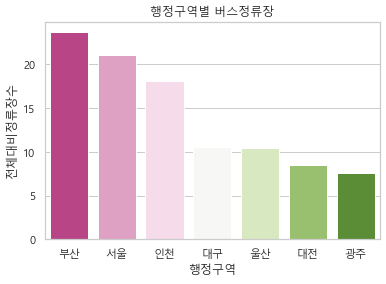

In [11]:
sns.barplot('행정구역','전체대비정류장수', data=result.sort_values('전체대비정류장수', ascending=False),palette ='PiYG')
plt.title('행정구역별 버스정류장')
plt.show()

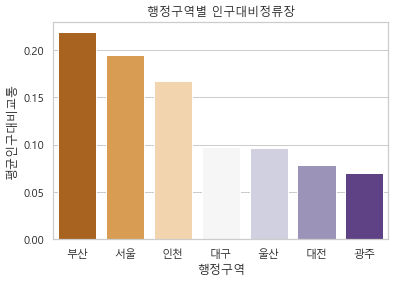

In [12]:
sns.barplot('행정구역','평균인구대비교통', data=result.sort_values('평균인구대비교통', ascending=False),palette ='PuOr')
plt.title('행정구역별 인구대비정류장')
plt.show()

In [13]:
result.to_csv('Bus_LOOK.csv',encoding='EUC-KR',index=False)